# Markov Kernel Learning

A Markov Kernel can be used to express probabilities of sequences of discrete time processes. Let $(\mathcal{X},\mathcal{F},m)$ be a measure space. We call $\mathcal{X}$ our state space, $\mathcal{F}$ our state spaces sigma algebra, and $m$ our reference measure. The most common case will be $(\mathbf{R},\mathcal{B}_\mathbf{R},Leb)$, where $\mathcal{B}_\mathbf{R}$ is the Borel sigma algebra using the standard topology on $\mathbf{R}=(-\infty,+\infty)$ and $Leb$ is the Lebesgue measure.

A Markov kernel function is a function

$$k:\mathcal{X}\times\mathcal{X}\to [0,1]$$

such that 

$$A\mapsto \int_A k(y,x) m(dy)$$ 

is a probability measure for every $x\in \mathcal{X}$ and for every $A\in \mathcal{F}$, 

$$x\mapsto \int_A k(y,x) m(dy)$$

is a measureable function. We call the function 

$$K:\mathcal{F}\times\mathcal{X}\to[0,1]$$

defined as 

$$K(A,x)=\int_A k(y,x) m(dy)$$

a Markov Kernel. Here $x$ represents the previous state and $y$ represents the current state. A kernel does a lot of things. It can be used to create measures like above. We would express it as:

$$K(dy;x)$$

It can also be used as a linear transformation on measurable functions. For example, a function $f:\mathcal{X}\to\mathbf{R}$ can be transformed into a function $K(f):\mathcal{X}\to\mathbf{R}$ by 

$$K(f)(y)=\int_{\mathcal{X}}k(y,x)f(x)m(dx)$$

where this integral is defined. 

A discrete-time Markov process is a sequence of random variables $X_0,X_1,X_2,...$ on $(\mathcal{X},\mathcal{F})$ with probability law $\mathbf{P}$ on $\mathcal{F}$ that satisfies the Markov condition, i.e.

$$\mathbf{P}(X_{n+1}\in A | X_n=x_n, ... , X_0=x_0)=\mathbf{P}(X_{n+1}\in A | X_n=x_n)$$


for all $A\in \mathcal{F}$. We're essentially requiring that the probability of transition from one state to another given a particular trajectory is dependent only on the previous state. If we begin with some initial law on $X_0$, say $\mu(dx_0):\mathcal{F}\to[0,1]$ is a probability measure, then we can define a measure on n jumps on the product 

$$\mathcal{F}_n=\bigotimes_{i=0}^n (\mathcal{X},\mathcal{F})$$

as:
$$\pi_n(dx_0,...,dx_n)=\mu(dx_0)K(dx_1;x_0)K(dx_2;x_1)...K(dx_n;x_{n-1})$$

Here we are taking $dx_i$ to mean $m(dx_i)$ and assuming that both $\mu$ and $K(dy;x)$ are absolutely continuous with respect to our reference measure $m$. We use a semi-colon to signify a separation between what arguments describe probabilities and what arguments parametrize said probabilities.

Now for $A_0\times...\times A_n\in \mathcal{F_n}$, its associated probability is taken to be the quantity:

$$\pi_n(dx_0,...,dx_n)(A_0\times..\times A_n)=\int_{A_n}...\int_{A_0}d\mu(x_0)k(x_1,x_0)...k(x_n,x_{n-1})dx_0...dx_n$$

The goal of this project is to parametrize $\mu_\omega$ and $k_\theta$ as families of neural networks that satisfy these properties in the hopes that they could model trajectories trained on real world data. For example, if we have a known trajectory $x_0,...,x_T$ taking on values in $\mathbf{R}$ we might define a probabilistic threshold $\delta$ so that $B_i=B_{\delta}(x_i)$ is a neighborhood of $x_i$ and consider the measure 
$$A\mapsto\int_{A\times B_T\times...\times B_0}d\mu_0(x_0)k(x_1,x_0)...k(x_T,x_{T-1})k(x,x_{T})dx_0...dx_T dx=\mathbf{P}(X_{T+1}\in A , (X_0,...,X_T)\in B_0\times...\times B_T )$$

But this doesn't take full advantage of the Markov condition, and it would be very costly to calculate the joint probability. If we have the known trajectory $(x_0,...,x_T)\in \mathcal{X}^{T+1}$ and we wanted to see the likelihood of $x_{T+1}=x$ landing in $A$ given the trajectory's history, then we would calculate:

$$\mathbf{P}(x\in A | (X_0,...,X_T)=(x_0,...,x_T) )=\mathbf{P}(x\in A | X_T=x_t)=\int_A k(x,x_T)dx$$

we call this measure:

$$\pi_{T+1}(dx|dx_0,...,dx_T)=\pi_{T+1}(dx|dx_T)$$

If we begin with an $x_0$ obtained from the intial law $\mu_0$, then we can simulate Markov chains by continuously drawing from the measure $K(dx_{n+1},x_n)$. Or we can simulate trajectories starting at some terminal value $x_T$.

We can further generalize the Markov condition to be dependent on the previous $m$ entries, i.e. we would have to have satisfy:

$$\mathbf{P}(X_{n+1}\in A | X_n=x_n,...,X_0=x_0)=\mathbf{P}(X_{n+1}\in A | X_n=x_n,...,X_{n+1-m}=x_{n+1-m})$$



This presents some problems whenever $n+1-m < 0$.There are two solutions here. One is to assume that x_i=x_0 for i<0, that is our trajectory remains at $x_0$ until it "comes to life" at time $0$. 

This would make our Markov function:

$$k(y,t_1,...,t_m):\mathcal{X}\times\mathcal{X}^{m}\to[0,1]$$

where $y$ represents the current state and $t_1,...t_m$ represent the previous $m$ states, and we define:

$$\pi_n(dx_0,...,dx_n)=\mu(dx_0)K(dx_1,x_0,...,x_0)K(dx_2,x_1,x_0,...x_0)...K(dx_{n},x_{n-1},...,x_{n-m})$$

In essence, we are filling in values for the assumed negative states. The advantage here is there is only one $K$ to work out. The disadvantage is that we might not be able to make such assumptions. We could also prescribe some value, say $\vec{0}\in \mathcal{X}$, so that 

$$\pi_n(dx_0,...,dx_n)=\mu(dx_0)K(dx_1,x_0,\vec{0},...,\vec{0})K(dx_2,x_1,x_0,\vec{0},...\vec{0})...K(dx_{n},x_{n-1},...,x_{n-m})$$

The alternative would be to build $m$ kernels, 

$$k_j(y,t_1,...,t_j):\mathcal{X}\times\mathcal{X}^j\to[0,1]$$

for $j=1,...,m$, and taking the joint probability to be:

$$\pi_n(dx_0,...,dx_n)=\mu(dx_0)K_1(dx_1;x_0)K_2(dx_2;x_1,x_0)...K_m(dx_{n};x_{n-1},...,x_{n-m})$$

This would be preferable as it requires no assumptions. The downside is that we would have to learn a total of $m+1$ functions.

For now, we will just consider the case $m=1$. We'll see that this is already quite difficult.

First, let's consider our initial law, $\mu_w:\mathcal{F}\to[0,1]$ parameterized by $w$. Let $e_0\in\mathbf{N}$ be the dimension for which $\mathcal{X}\subset \mathbf{R}^{e_0}$. We will also express $x_0$'s coordinates by:

$$x_0=(x_0^1,x_0^2,...,x_0^{e_0})$$

It turns out to be pretty difficult to force a neural network to behave like a density function.

We can instead model the cumulative density function as the product of CDFs:

$$F_w(t_1,...,t_{e_0})=F_w^1(t_1)\cdot...\cdot F_w^{e_0}(t_{e_0})=\bigg(\int_{-\infty}^{t_{1}}d\mu_w^1(x_0^1)dx_0^1\bigg)...\bigg(\int_{-\infty}^{t_{e_0}}d\mu_w^{e_0}(x_0^{e_0})dx^{e_0}_0\bigg)$$

and then take $$d\mu_w(v_0)=\frac{d^{e_0}}{dt_0...dt_{e_0}}F_w(t_1,...,t_{e_0})\vert_{\vec{t}=v_0}=\prod_{j=1}^{e_0}\frac{d}{dt_j}F^j_w(t_j)\vert_{t_j=v_0^j}=\prod_{j=1}^{e_0}d\mu_w^j(t_j)$$

This definition implicitly assumes that the components of $X_0$ are independent as random variables.

It becomes far easier to ensure a Neural Network behaves like a distribution. All we really need is that $F_w$ is non-negative, non-decreasing as any $t_j$ increases, goes to $0$ as any $t_j\to-\infty$, and goes to $1$ as $t_j\to+\infty$. The easiest way to ensure this is by considering two types of layers in our Neural Network.

## Terminal Layer
Let's assume for a moment that our network has zero hidden layers, and just one terminal one. Since a CDF can't exceed 1, it makes sense to use a sigmoidal activation. If $w_j$ encodes the weight of the linear portion and $b_j$ the bias, each component's CDF would look like:

$$F^j_w(t_j)=\sigma(w_j\cdot t_j+b_j)$$

The derivative of this function with respect to $t_j$ will give us:

$$\sigma'(w_j\cdot t_j+b_j)\cdot w_j$$

And so, our final density is:
$$\prod_{j=1}^{e_0}\sigma'(w_j\cdot t_j+b_j)\cdot w_j$$

Observe that as long as each $w_j>0$, this quantity is positive, making $F_w$ monotone increasing with each $t_j$. Moreover, as $t_j\to-\infty$ $F^j_w(t_j)\to 0$.Therefore, $F_w(\vec{t})\to 0$ if any $t_j\to-\infty$. If every $t_j\to+\infty$, then each $F^j_w(t_j)\to 1$. Therefore $F_w(\vec{t})\to 1$.

Hence, $F_w$ has all the markings of a cumulative distribution function. One way we can enforce positivity of the weights is by a component-wise exponentiation of the weight matrix.

Let's create this terminal Layer now in PyTorch.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [4]:
torch.set_default_dtype(torch.float64)

In [5]:
class Mu_Terminal_Layer(nn.Module):
    def __init__(self,n_in,n_out):
        super().__init__()
        self.n_in,self.n_out=n_in,n_out
        self.weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.bias=nn.Parameter(torch.zeros(n_out,dtype=torch.float64))
        lim=0.01
        nn.init.uniform_(self.weights,-5,-4) #init weights between e^(-5) and e^(-4)
        nn.init.uniform_(self.bias,-lim,lim) #init weights between -lim and lim
        
    def forward(self,a_prev):
        z=a_prev
        z=torch.add(torch.mm(z,self.weights.exp().t()),self.bias) #z=a_prev*exp(W^t)+b
        a=torch.sigmoid(z) #a=sigmoid(z)
        return a

## Generic Layer

We also need to incorporate hidden layers, so we will prove that we can create a generic hidden layer between the input and terminal that does not break anything else.

Let $f^j_w:\mathbf{R}\to \mathbf{R}^{n_{l}}$ be defined as:
$$\vec{a}^1_j=f^j_w(t_j)=h(t_j\cdot[w^1_1,...,w^1_{n_l}]+\vec{b}_j^1)$$
with some activation $h$. Now let:
$$F^j_w(t_j)=a^2_j=\sigma(\vec{a}^1_j\cdot [w^2_1,...,w^2_{n_l}] + b_j^2 )$$

Taking the derivative, again, will give us:

$$\sigma'(\vec{a}^1_j\cdot [w^2_1,...,w^2_{n_l}] + b_j^2)\ast [w^2_1,...,w^2_{n_l}] \circ h'(t_j\cdot w^1+\vec{b}_j^1)\ast[w^1_1,...,w^1_{n_l}]^\perp $$

If we force the weights to be positive, we see that the only real obstacle is the choice of activation function $h$. If $h'$ is non-negative, we can at least guarantee that $F^j$ is non-decreasing and non-negative. But does it necessarily make $F^j$ a CDF?

As $t_j\to+\infty$, $a^1_j\to \sup h$. And as $t_j\to-\infty$, $a^1_j\to\inf h$ This means that $F^j_w$ is ultimately contained in $[\sigma(\inf h), \sigma(\sup h)]$. We therefore must require that $h$ maps $\pm\infty$ to $\pm\infty$ or else $F^j$ does not define a CDF. We need the hidden activation functions to be monotone homeomorphisms of the real line that are differentiable, at least almost everywhere. We might use something like a Leaky ReLU or a Parametric ReLU. Here we decide to go with $z\mapsto z^3$

In [6]:
class Mu_Generic_Layer(nn.Module):
    def __init__(self,n_in,n_out):
        super().__init__()
        self.n_in=n_in
        self.n_out=n_out
        self.weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.bias=nn.Parameter(torch.zeros(n_out,dtype=torch.float64))
        lim=0.01
        nn.init.uniform_(self.weights,-5,-4) #init weights between e^(-5) and e^(-4)
        nn.init.uniform_(self.bias,-lim,lim) #init weights between -lim and lim
        
    def forward(self,a_prev):
        z=a_prev
        z=torch.mm(z,self.weights.exp().t())
        z=z+self.bias #z=a_prev*exp(W^t) + b
        #a=nn.PReLU(num_parameters=self.n_out,init=0.1)(z) #a=h(z)
        #a=nn.LeakyReLU(0.1)(z)
        #a=torch.tanh(z)*(z**2)
        a=z**3
        return a

In [7]:
for x in Mu_Generic_Layer(1,5).parameters():
    print(x)

Parameter containing:
tensor([[-4.3745],
        [-4.8901],
        [-4.6499],
        [-4.0437],
        [-4.4297]], requires_grad=True)
Parameter containing:
tensor([-0.0010, -0.0071, -0.0068,  0.0079, -0.0097], requires_grad=True)


The following class will generate a PyTorch Initial Law Model. It only requires an $(e_0,L)$ signature matrix of the form:
$$e_{sig}=\left(\begin{array}{cc} 
1 & \ast  & \ast  & \cdots & \ast\\ 
1 & \ast  & \ast  & \cdots & \ast \\
\vdots & \vdots  & \vdots & \ddots & \vdots \\
1 & \ast & \ast & \cdots & \ast
\end{array}\right)$$

The entries represent the height of the network, the number of rows represent the dimension of the state space and the number of columns represent the depth of the network. For example:

$$e_{sig}=\left(\begin{array}{cc} 
1 & 2  & 3 
\end{array}\right)$$

is a Neural network that maps $\mathbf{R}\to\mathbf{R}^2\to\mathbf{R}^3\to[0,1]$

Note we don't need to specify the height of the terminal layers, since those have to be zero. As another example, 

$$e_{sig}=\left(\begin{array}{cc} 
1 & 3 & 3\\ 
1 & 3 & 3 
\end{array}\right)$$
encodes two neural networks that map $\mathbf{R}\to\mathbf{R}^3\to\mathbf{R}^3\to[0,1]$
These two neural nets are $F^1$ and $F^2$. The final product is the (actual) product: $$F=F^1\cdot F^2$$
definiing a function $F:\mathbf{R}^2\to\mathbf{R}$

In [8]:
class Initial_Law_Model(nn.Module):
    def __init__(self,e_sig):
        super(Initial_Law_Model, self).__init__()
        self.e_sig=np.array(e_sig)
        E_sig=[]
        for i in range(0,e_sig.shape[-1]):
            E_sig.append(int(np.sum(e_sig[:,i])))
        self.gen_layers=[]
        self.term_layers=[]
        self.E_sig=E_sig
        for k in range(0,E_sig[0]):
            layer_list=list(e_sig[k,:])
            for l in range(1,len(layer_list)):
                self.gen_layers.append(['('+str(k)+','+str(l)+')',Mu_Generic_Layer(layer_list[l-1],layer_list[l])])
            self.term_layers.append([str(k),Mu_Terminal_Layer(layer_list[-1],1)])
        self.term_layers_mod=nn.ModuleDict(self.term_layers)
        self.gen_layers_mod=nn.ModuleDict(self.gen_layers)
        
    def forward(self, x_input):
        for k in range(0,self.E_sig[0]):
            z=x_input[:,k].view(x_input.shape[0],1)
            layer_list=list(self.e_sig[k,:])
            for l in range(1,len(layer_list)):
                z=self.gen_layers_mod['('+str(k)+','+str(l)+')'](z)
            z=self.term_layers_mod[str(k)](z)
            if k==0:
                a=z
            else:
                a=torch.multiply(a,z)
        return a

Here is the second example in practice:

In [9]:
test=Initial_Law_Model(np.array([[1,3,3],
                                 [1,3,3]]))

In [10]:
test.parameters

<bound method Module.parameters of Initial_Law_Model(
  (term_layers_mod): ModuleDict(
    (0): Mu_Terminal_Layer()
    (1): Mu_Terminal_Layer()
  )
  (gen_layers_mod): ModuleDict(
    ((0,1)): Mu_Generic_Layer()
    ((0,2)): Mu_Generic_Layer()
    ((1,1)): Mu_Generic_Layer()
    ((1,2)): Mu_Generic_Layer()
  )
)>

Here's the first example:

In [11]:
test=Initial_Law_Model(np.array([[1,2,3]]))

In [12]:
test.parameters

<bound method Module.parameters of Initial_Law_Model(
  (term_layers_mod): ModuleDict(
    (0): Mu_Terminal_Layer()
  )
  (gen_layers_mod): ModuleDict(
    ((0,1)): Mu_Generic_Layer()
    ((0,2)): Mu_Generic_Layer()
  )
)>

The following function gets the jacobian of some number of inputs of appropriate size:

In [13]:
def get_jacobian(output,x_input, batch_size, input_dim, output_dim):
    jacobian=torch.zeros(batch_size,output_dim,input_dim,device=x_input.device)
    for i in range(output_dim):
        grad_out=torch.zeros(batch_size,output_dim,device=x_input.device)
        grad_out[:,i]=1
        grad_in=torch.autograd.grad(output,x_input,grad_out,create_graph=True)[0]
        jacobian[:,i,:]=grad_in.view(batch_size,input_dim)
    return jacobian.view(batch_size,-1)

Here's the jacobian of the function $x\mapsto x^2$ (two samples at 1 and -3):

In [14]:
x_test=torch.tensor([1.0,-3.0],requires_grad=True,dtype=torch.float64).view(2,1)
get_jacobian(torch.pow(x_test,2),x_test,2,1,1)

tensor([[ 2.],
        [-6.]], grad_fn=<ViewBackward0>)

Note that this does not work if you pass it through a predefined Batch Norm Layer:

In [15]:
x_test=torch.tensor([1.0,-3.0],requires_grad=True,dtype=torch.float64).view(2,1)
get_jacobian(torch.pow(nn.BatchNorm1d(1,affine=False)(x_test),2),x_test,2,1,1)

tensor([[ 2.5000e-06],
        [-2.5000e-06]], grad_fn=<ViewBackward0>)

Here is what it looks like using a more complicated model (3 samples, 2 dimensional input):

In [16]:
test=Initial_Law_Model(np.array([[1,3,3],
                                 [1,3,3]]))

In [17]:
x_test=torch.tensor([[-1.0,1.0],[-2,1.0],[-30.0,1.0]],requires_grad=True,dtype=torch.float64).view(3,2)

In [18]:
get_jacobian(test(x_test),x_test,3,2,1)

tensor([[8.5977e-14, 1.0145e-13],
        [5.2027e-13, 1.0145e-13],
        [2.9796e-10, 1.0145e-13]], grad_fn=<ViewBackward0>)

To get the products across these gradients:

In [19]:
torch.prod(get_jacobian(test(x_test),x_test,3,2,1),dim=1).view(x_test.shape[0],1)

tensor([[8.7227e-27],
        [5.2783e-26],
        [3.0229e-23]], grad_fn=<ViewBackward0>)

In order to get autograd to work, we need to specify requires_grad=True anytime we want to evaluate derivatives with respect to the input.

Now the question of how we can learn a distribution hinges on the loss function we're aiming to minimize.

Suppose we have a density function $dq:\mathcal{X}\to[0,1]$ and a parametric model $d\mu:\mathcal{X}\to[0,1]$. Then we can define the relative entropies of $\mu$ with respect to $q$ is:

$$D(\mu || q) = \int_{\mathcal{X}}\log\bigg(\frac{\mu(dx)}{q(dx)}\bigg) q(dx)$$

where $\mu$ is absolutely continuous with respect to $q$, otherwise the density $\mu(dx)/q(dx)$ is not guaranteed to exist. It would be a great option since achieving a $0$ would imply the two densities are the same ($q$ - almost everywhere). This, however, is not always the case. In order to get a loss function such as this working, we would have to employ a non-parametric method for approximating $q$ using samples (think Histograms). And if $q$ is a discrete measure, this would be impossible as $\mu$ is defined to be absolutely continuous. Since we want to make no assumptions on $q$, we will instead employ a cross entropy loss function:

$$C(q,\mu)=-\mathbf{E}_{dq}(\log(d\mu))\approx - \frac{1}{N}\sum_{i=0}^N\log(d\mu(x^{(i)}))$$
for a sample set $\{ x^{(i)} ~:~i=1,...,N\}$.

Now if $q$ is a continuous distribution, it can be shown that

$$C(q,\mu)=D(\mu || q) + H(q)$$

where

$$H(q)=-\mathbf{E}_{dq}(\log(dq))=-\int_{\mathcal{X}}\log(dq(x))q(dx)$$

is the overall entropy of the distribution $q$. Minimizing one is equivalent to minimizing the other. It is in fact preferable to minimize cross entropy as it requires no assumptions on $q$, just the data to approximate the expectation. 

Let's define the loss function:

In [20]:
def custom_loss(outputs,inputs,batch_size,input_dim,output_dim):
    ep=1e-10 # to avoid blowing up the loss function we add a buffer
    jac=torch.prod(get_jacobian(outputs,inputs,batch_size,input_dim,output_dim),dim=1).view(batch_size,1)
    tmp_loss=-torch.mean(torch.log(jac+ep))
    return tmp_loss

We'll calculate the loss of of a fake sample:

In [21]:
test=Initial_Law_Model(np.array([[1,3,3],
                                 [1,3,3]]))

In [22]:
x_test=torch.tensor([[-1.0,1.0],[-2,1.0],[-30.0,1.0]],requires_grad=True,dtype=torch.float64).view(3,2)

In [23]:
custom_loss(test(x_test),x_test,3,2,1)

tensor(23.0259, grad_fn=<NegBackward0>)

Define a training loop:

In [24]:
def train_network(t_model,t_optimizer,X_train,num_epochs):
    train_loss=[]
    for epoch in range(num_epochs):
        t_out=t_model(X_train)
        loss=custom_loss(t_out,X_train,X_train.shape[0],X_train.shape[1],1)
        train_loss.append(loss.item())
        t_optimizer.zero_grad()
        loss.backward()
        t_optimizer.step()
        if (epoch + 1)%10==0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}")
    return train_loss

Get a random sample of points according to a distribution:

In [25]:
sample_size=100000
samples=np.random.randn(sample_size)

In [26]:
samples

array([ 1.94492206,  1.38750203,  0.42946165, ..., -0.05372974,
        1.53818192,  0.03825953])

In [27]:
x_train=torch.tensor(samples,requires_grad=True,dtype=torch.float64).view(sample_size,1)

In [28]:
x_train

tensor([[ 1.9449],
        [ 1.3875],
        [ 0.4295],
        ...,
        [-0.0537],
        [ 1.5382],
        [ 0.0383]], grad_fn=<ViewBackward0>)

Initiate a model:

In [29]:
mu=Initial_Law_Model(np.array([[1,25,25,25,5]]))

Define a learning rate, optimizer, and test the loss function:

In [30]:
learning_rate=0.1

In [31]:
optimizer=torch.optim.Adam(mu.parameters(),lr=learning_rate)

In [32]:
custom_loss(mu(x_train),x_train,x_train.shape[0],1,1)

tensor(23.0259, grad_fn=<NegBackward0>)

Train the network:

In [33]:
losses=train_network(mu,optimizer,x_train,num_epochs=100)

Epoch 10/100, Train Loss: 11.202314769542236
Epoch 20/100, Train Loss: 1.8207838086009172
Epoch 30/100, Train Loss: 2.3159801610148074
Epoch 40/100, Train Loss: 1.681825965946245
Epoch 50/100, Train Loss: 1.5801160721452212
Epoch 60/100, Train Loss: 1.4957154036667657
Epoch 70/100, Train Loss: 1.4505578598611697
Epoch 80/100, Train Loss: 1.4323952657759063
Epoch 90/100, Train Loss: 1.4242153984098975
Epoch 100/100, Train Loss: 1.4209325720490114


Let's plot the training results:

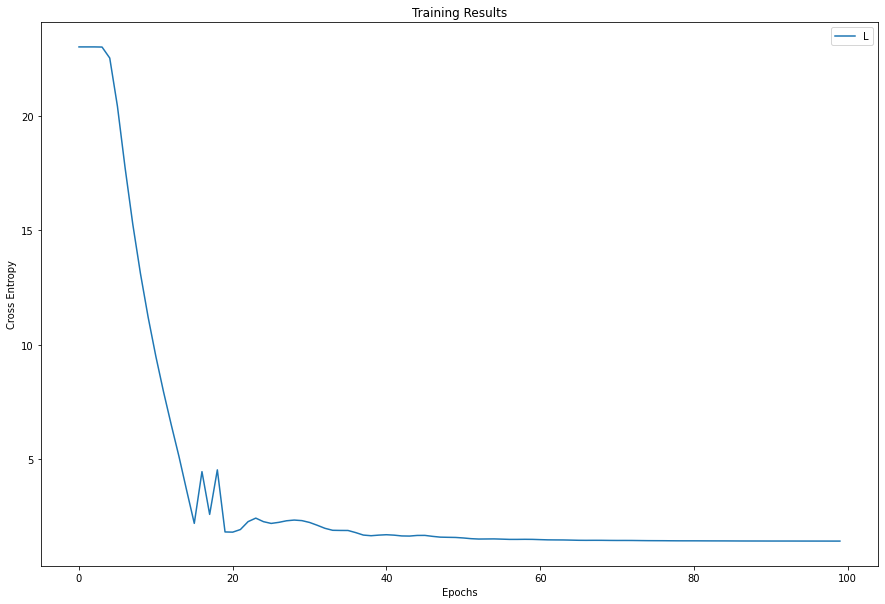

In [34]:
plt.plot(losses)
plt.legend('Losses')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.title('Training Results')
plt.show()

Plot the CDFs:

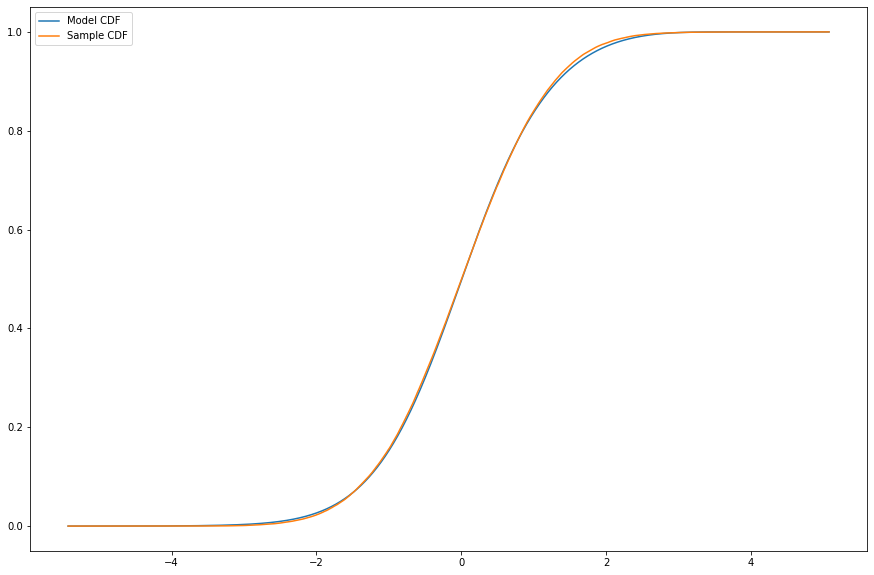

In [35]:
l=1
r=1
mesh_size=10000
x_viz=np.linspace(min(samples)-l,max(samples)+r,mesh_size)
y_viz=mu(torch.tensor(x_viz,requires_grad=True,dtype=torch.float64).view(x_viz.shape[0],1)).view(x_viz.shape[0])
y_viz=y_viz.detach().numpy()
y_true,x_true=np.histogram(samples,bins=np.linspace(min(samples)-l,max(samples)+r,mesh_size+1))
y_true=y_true/sum(y_true)
y_tot=np.zeros(y_true.shape)
for t in range(len(y_true)):
    y_tot[t]=np.sum(y_true[0:t])
plt.plot(x_viz,y_viz,x_viz,y_tot)
plt.legend(['Model CDF','Sample CDF'])
plt.show()

Plot the PDFs:

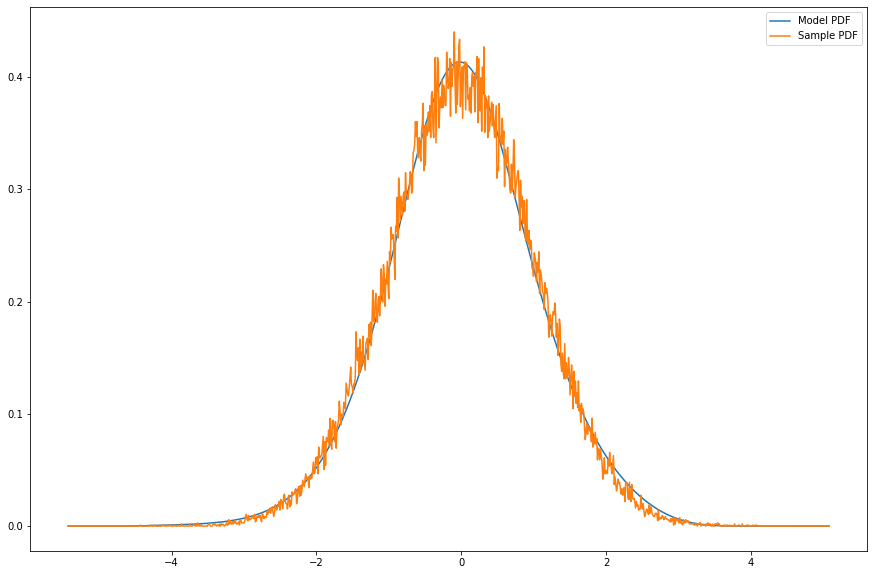

In [36]:
l=1
r=1
mesh_size=1000
x_viz=np.linspace(min(samples)-l,max(samples)+r,mesh_size)
x_tmp=torch.tensor(x_viz,requires_grad=True,dtype=torch.float64).view(x_viz.shape[0],1)
y_viz=mu(x_tmp)
y_viz=get_jacobian(y_viz,
                   x_tmp,
                   x_viz.shape[0],1,1).view(x_viz.shape[0]).detach().numpy()
y_true,x_true=np.histogram(samples,bins=np.linspace(min(samples)-l,max(samples)+r,mesh_size+1))
y_true=y_true/sum(y_true*(x_viz[1]-x_viz[0]))
#plt.plot(x_viz,y_viz,x_train.view(x_train.shape[0]).detach().numpy(),y_train.view(y_train.shape[0]).detach().numpy())
plt.plot(x_viz,y_viz,x_viz,y_true)
plt.legend(['Model PDF','Sample PDF'])


## Training a Kernel Function

We will take a similar route when defining generic and terminal layers for the kernel function. The goal is to create a function:

$$G:\mathbf{R}^{e_0}\times\mathbf{R}^{e_0}\to [0,1]$$

such that $G(\cdot, \vec{x}):\mathbf{R}^{e_0}\to [0,1]$ behaves like a CDF for all $\vec{x}\in \mathbf{R}^{e_0}$

Let's start with another signature matrix:

$$e_{sig}=\left(\begin{array}{cc} 
1 & \ast  & \ast  & \cdots & \ast\\ 
1 & \ast  & \ast  & \cdots & \ast \\
\vdots & \vdots  & \vdots & \ddots & \vdots \\
1 & \ast & \ast & \cdots & \ast
\end{array}\right)$$

With the initial law model, this would encode $e_0$ distinct neural networks that we multiply together in the end. And we will do the same thing here, except that we train $e_0$ distinct functions of the form:

$$G^j:\mathbf{R}\times\mathbf{R}^{e_0}\to [0,1]$$

for $j=1,...,e_0$. The idea is that each $G^j$ represents the CDF:

$$G^j(t,\vec{x})=\mathbf{P}(y^j\leq t | \vec{x})$$

Now $e_{sig}$ might encode the heights of the network of the variable $t$, so we need to introduce the other half of the network as a $1\times L$ vector:

$$D_{sig}=\left(\begin{array}{cc} 
e_0 & \ast  & \ast  & \cdots & \ast
\end{array}\right)$$

One option is to take this vector as the sum of $e_sig$ along its rows. We call that $E_{sig}$. That's what we'll use for ease of programming.

Just like last time, there will be constraints on the weight matrices of each network. First, lets assume that this network has zero hidden layers.

## Kernel Terminal Layer

If we take $G^j:\mathbf{R}\times \mathbf{R}^{e_0}\to [0,1]$ to be:

$$G^j(t,\vec{x})=\sigma(W_j\cdot[t, \vec{x}]^{\perp} + b_j)$$

where $W_j$ is an $(1,e_0+1)$ matrix. Then its derivative with respect to $t$ for a fixed $\vec{x}$ will be:
$$\sigma'(W_j\cdot[t,\vec{x}]+b_j)\cdot W_j^1$$

So the only constraint we need is that the first entry is positive.

Things will get a little more complicated once we introduce a generic layer.

## Kernel Generic Layer

Let's work with a single hidden layer:

$$a^{[1]}=h(W_j^{[1]}\cdot [t,\vec{x}] +b_j^{[1]}$$

where $h$ is an activation function, and $W_j^{[1]}$ is an $((D_{sig})_{2}+(e_{sig})^{j}_{2},1+(D_{sig})_{1})$ matrix.

Essentially, each matrix $W_j^{[\ell]}$ is a matrix of the form:

$$\left(
\begin{array}{c|c}
(W_j^{\ell})^{+}_{+} & (W_j^{\ell})^{+}_{-} \\
\hline
(W_j^{\ell})^{-}_{+} & (W_j^{\ell})^{-}_{-}
\end{array}\right)$$

The output of the previous layer is the input of the current one, lets split the vector as: 

$$[\vec{t}_{[\ell-1]}~|~\vec{x}_{[\ell-1]}]\in \mathbf{R}^{(e_{sig}^j)_{\ell-1}}\times\mathbf{R}^{D_{sig}^\ell}$$

This puts:

$$z^{[\ell]}=[\vec{t}_{[\ell]}~|~\vec{x}_{[\ell]}]=W_j^{[\ell]}[\vec{t}_{[\ell-1]}~|~\vec{x}_{[\ell-1]}]^{}+b^{[\ell]}=\left(
\begin{array}{c}
(W_j^{\ell})^{+}_{+}\vec{t}_{[\ell-1]} + (W_j^{\ell})^{+}_{-}\vec{x}_{[\ell-1]} \\
\hline
(W_j^{\ell})^{-}_{+}\vec{t}_{[\ell-1]} + (W_j^{\ell})^{-}_{-}\vec{x}_{[\ell-1]}
\end{array}\right)+b^{[\ell]}$$

and 

$$a^{[\ell]}=h(z^{[\ell]})=[a^{[\ell]}_+~|~a^{[\ell]}_-]$$

If our neural network has one hidden layer, then this is the input of the terminal layer. We we would require that $(W^\ell_j)^+_+>0$ and $(W^\ell_j)^-_+=0$. Now if $t\to +\infty$, then $\vec{t}_{[\ell]}\to+\infty$, and so does $ a_+^{[\ell]}$ if we take $h$ to be a pointwise orientation preserving diffeomorphism. The linear output of the terminal layer is then:

$$z'=[\vec{w}^+|\vec{w}^-]\cdot[\vec{a}^{[\ell]}_+~|~\vec{a}^{[\ell]}_-]+b'$$

where $w^+>0$. Now as $a_+^{[\ell]}\to+\infty$, so does $z'$. Because the lower part of the input of $z'$ is not affected by $\vec{t}_{[\ell-1]}$, there's no issue of some component of the dot product undoing the growth of another as $\vec{t}_{[\ell-1]}$. This is why we require that $(W^{\ell}_j)^-_+ > 0$ as well. Likewise, if $t\to-\infty$, then so does $z'$. This means that as long as the generic layer matrices look like this:

$$\left(
\begin{array}{c|c}
>\mathbf{0} & \ast \\
\hline
\geq\mathbf{0} & \ast
\end{array}\right),$$

each generic activation $h$ takes $\pm \infty\mapsto \pm \infty$, and the terminal layer matrix looks like:

$$\left(
\begin{array}{c|c}
>\mathbf{0} & \ast
\end{array}\right),$$

then the Neural Network models the CDF:

$$\mathbf{P}(y^j\leq t | \vec{x}).$$

Finally, we take 

$$G(\vec{t},\vec{x})=\prod_{j=1}^{e_0}G^j(t_j,\vec{x})=\mathbf{P}(\vec{y}\leq \vec{t} ~|~ x_{prev}=\vec{x})$$

and 

$$k(\vec{y},\vec{x})=\frac{d^{e_0}}{dt_1...dt_{e_0}}G(\vec{t},\vec{x})=\prod_{j=1}^{e_0}\frac{d}{dt_j}G^j(t_j,\vec{x})$$

becomes the kernel function we're after.

Heuristically, the top left represents the nonlinearities of the current state distribution independent of the previous state, then the lower left quadrant encodes the effect that the current state has on the previous state. Which we might even require to be zero. Likewise, the bottom right quadrant represents the nonlinearities of the previous state while the top right quadrant represents the effect that the previous state has on the current state.

This is not proven, it's just an interpretation of this kind of set up.

Let's define the generic layer:

In [37]:
class G_Generic_Layer(nn.Module):
    def __init__(self,n_in,e_in,n_out,e_out):
        super().__init__()
        self.n_in,self.n_out=n_in,n_out #total size of matrix
        self.e_in=e_in #dimension of t component input
        self.e_out=e_out #dimension of t component output
        self.t_weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.x_weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.bias=nn.Parameter(torch.zeros(n_out,dtype=torch.float64))
        lim=0.01
        nn.init.uniform_(self.t_weights,-5,-4) #init t component weights between e^(-5) and e^(-4)
        nn.init.uniform_(self.bias,-lim,lim) #init bias between -lim and lim
        nn.init.uniform_(self.x_weights,-lim,lim) #init x component weights between -lim and lim
        
        #create a mask for top left  and botom left quadrants
        mask_pp=np.zeros((n_out,n_in))
        for i in range(0,e_in):
            #for j in range(0,e_out): #we use this instead to require bottom left is 0
            #    mask_pp[j,i]=1
            mask_pp[:,i]=1
        self.mask_pp=torch.tensor(mask_pp,dtype=torch.float64)
        
        #create a mask for top right and bottom right quadrants
        mask_x=np.zeros((n_out,n_in))
        for i in range(e_in,n_in):
            mask_x[:,i]=1
        
        self.mask_x=torch.tensor(mask_x,dtype=torch.float64)
        
    def forward(self,a_prev):
        z=a_prev
        W=(self.mask_pp*self.t_weights).exp().t()+(self.mask_x*self.x_weights).t()
        z=torch.mm(z,W)
        z=torch.add(z,self.bias)
        #a=nn.PReLU()(z) #a=h(z)
        a=z**3
        return a

We have to rely on masks, which are matrices with entries in 0 or 1, then apply the masks to the weights via a Hadamaar product. This results in a lot of extra unused parameters:

In [38]:
k_test=G_Generic_Layer(3,2,4,3)

In [39]:
for x in k_test.parameters():
    print(x)

Parameter containing:
tensor([[-4.0859, -4.3800, -4.3141],
        [-4.9817, -4.4116, -4.0314],
        [-4.1528, -4.6637, -4.6550],
        [-4.7219, -4.0361, -4.8158]], requires_grad=True)
Parameter containing:
tensor([[ 0.0007,  0.0034,  0.0059],
        [ 0.0076, -0.0026,  0.0019],
        [-0.0078, -0.0043, -0.0099],
        [-0.0030,  0.0032, -0.0062]], requires_grad=True)
Parameter containing:
tensor([ 0.0017, -0.0097, -0.0037, -0.0009], requires_grad=True)


This seems to be the most efficient way to exponentiate specific sections of a matrix to satisfy the positivity condition, and zero out a section to satisfy the zero condition.

Likewise, we define a terminal layer:

In [40]:
class G_Terminal_Layer(nn.Module):
    def __init__(self,n_in,e_in,n_out,e_out):
        super().__init__()
        self.n_in,self.n_out=n_in,n_out #total size of matrix
        self.e_in=e_in #dimension of t component input
        self.e_out=e_out #dimension of t component output
        self.t_weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.x_weights=nn.Parameter(torch.zeros((n_out,n_in),dtype=torch.float64))
        self.bias=nn.Parameter(torch.zeros(n_out,dtype=torch.float64))
        lim=0.01
        nn.init.uniform_(self.t_weights,-5,-4) #init t component weights between e^(-5) and e^(-4)
        nn.init.uniform_(self.bias,-lim,lim) #init bias between -lim and lim
        nn.init.uniform_(self.x_weights,-lim,lim) #init x component weights between -lim and lim
        
        #create a mask for top left and bottom left quadrants
        mask_pp=np.zeros((n_out,n_in))
        for i in range(0,e_in):
            #for j in range(0,e_out): # we use this instead to require bottom left is 0
            #    mask_pp[j,i]=1
            mask_pp[:,i]=1
        self.mask_pp=torch.tensor(mask_pp,dtype=torch.float64)
        
        #create a mask for top right and bottom right quadrants
        mask_x=np.zeros((n_out,n_in))
        for i in range(e_in,n_in):
            mask_x[:,i]=1
        
        self.mask_x=torch.tensor(mask_x,dtype=torch.float64)
        
    def forward(self,a_prev):
        z=a_prev
        W=(self.mask_pp*self.t_weights).exp().t()+(self.mask_x*self.x_weights).t()
        #W=self.t_weights.exp().t()
        z=torch.mm(z,W)
        #z=torch.mm(z,self.t_weights.exp().t())
        z=torch.add(z,self.bias)
        #z=torch.add(torch.mm(z,(self.mask_pp*self.t_weights).exp().t()+(self.mask_x*self.x_weights).t()),self.bias)
        a=torch.sigmoid(z) #a=h(z)
        return a

In [41]:
k_test=G_Terminal_Layer(2,1,1,1)

In [42]:
for x in k_test.parameters():
    print(x)

Parameter containing:
tensor([[-4.9080, -4.8684]], requires_grad=True)
Parameter containing:
tensor([[-0.0042,  0.0067]], requires_grad=True)
Parameter containing:
tensor([0.0069], requires_grad=True)


This class builds the $G$ model:

In [43]:
class G_Model(nn.Module):
    def __init__(self,e_sig):
        super(G_Model, self).__init__()
        self.e_sig=np.array(e_sig)
        E_sig=[]
        for i in range(0,e_sig.shape[-1]):
            E_sig.append(int(np.sum(e_sig[:,i])))
        self.gen_layers=[]
        self.term_layers=[]
        self.E_sig=E_sig
        for k in range(0,E_sig[0]):
            layer_list=list(e_sig[k,:])
            for l in range(1,len(layer_list)):
                if l==1:
                    self.gen_layers.append(['('+str(k)+','+str(l)+')',G_Generic_Layer(E_sig[l-1]+layer_list[l-1],
                                                                                      layer_list[l-1],
                                                                                      E_sig[l]+layer_list[l],
                                                                                      layer_list[l])])
                else:
                    self.gen_layers.append(['('+str(k)+','+str(l)+')',G_Generic_Layer(E_sig[l-1]+layer_list[l-1],
                                                                                      layer_list[l-1],
                                                                                      E_sig[l]+layer_list[l],
                                                                                      layer_list[l])])
            self.term_layers.append([str(k),G_Terminal_Layer(E_sig[-1]+layer_list[-1],
                                                             layer_list[-1],
                                                             1,
                                                             1)])
        self.term_layers_mod=nn.ModuleDict(self.term_layers)
        self.gen_layers_mod=nn.ModuleDict(self.gen_layers)
        
    def forward(self, x_input):
        for k in range(0,self.E_sig[0]):
            z=torch.cat([x_input[:,k].view(x_input.shape[0],1),
                        x_input[:,self.E_sig[0]:].view(x_input.shape[0],self.E_sig[0])],axis=1)
            #print(z)
            layer_list=list(self.e_sig[k,:])
            for l in range(1,len(layer_list)):
                z=self.gen_layers_mod['('+str(k)+','+str(l)+')'](z)
            z=self.term_layers_mod[str(k)](z)
            if k==0:
                a=z
            else:
                a=torch.multiply(a,z)
        return a

Let's try an example with 

$$e_{sig}=\left(\begin{array}{cc} 
1 & 2  & 2  &  2\\ 
1 & 2  & 3  & 2 \\
1 & 3 & 3 & 2
\end{array}\right)$$

In [44]:
e=np.array([[1,2,2,2],
           [1,2,3,2],
           [1,3,3,2]])

In [45]:
k_test=G_Model(e)

In [46]:
k_test.parameters

<bound method Module.parameters of G_Model(
  (term_layers_mod): ModuleDict(
    (0): G_Terminal_Layer()
    (1): G_Terminal_Layer()
    (2): G_Terminal_Layer()
  )
  (gen_layers_mod): ModuleDict(
    ((0,1)): G_Generic_Layer()
    ((0,2)): G_Generic_Layer()
    ((0,3)): G_Generic_Layer()
    ((1,1)): G_Generic_Layer()
    ((1,2)): G_Generic_Layer()
    ((1,3)): G_Generic_Layer()
    ((2,1)): G_Generic_Layer()
    ((2,2)): G_Generic_Layer()
    ((2,3)): G_Generic_Layer()
  )
)>

Let's try evaluating some input (3 samples, 3-dimensional  t-input):

In [47]:
x_test=torch.tensor(0.01*np.random.randn(3,6),requires_grad=True,dtype=torch.float64).view(3,6)

In [48]:
k_test(x_test)

tensor([[0.1253],
        [0.1253],
        [0.1253]], grad_fn=<MulBackward0>)

The output consists of three samples of CDF values.

To get the PDF from this model, we need to modify the previous gradient function.
The gradient function originally found the gradients of each sample using the entire input:

In [49]:
get_jacobian(k_test(x_test),x_test,3,6,1)

tensor([[2.0477e-12, 9.2511e-13, 1.5907e-12, 3.7162e-10, 3.7161e-10, 3.7260e-10],
        [3.8413e-13, 2.4806e-13, 3.8043e-13, 9.3067e-11, 9.3212e-11, 9.3195e-11],
        [3.4923e-13, 1.4858e-13, 2.7568e-13, 6.6208e-11, 6.6268e-11, 6.6391e-11]],
       grad_fn=<ViewBackward0>)

But we only need the product of the first $e_0$ values:

In [50]:
torch.prod(get_jacobian(k_test(x_test),x_test,3,6,1)[:,0:e[:,0].sum()],axis=1).view(3,1)

tensor([[3.0134e-36],
        [3.6250e-38],
        [1.4304e-38]], grad_fn=<ViewBackward0>)

## Kernel Loss Function

We will define the loss function as:

$$L(p,K)=-\mathbf{E}_{dp}(\log(kd\mu))\approx - \frac{1}{N}\sum_{i=0}^N\log(k(y^{(i)},x^{(i)})d\mu(x^{(i)}))$$
for a sample set $\{ (y^{(i)},x^{(i)}) ~:~i=1,...,N\}$, where $p$ is the joint probability of $1$-jumps from a previous to current state,

and $$dJ(y,x)=k(y,x)d\mu(x)dx$$
where $J$ represents the modeled joint pdf of $y,x$ given $x$ and $d\mu(x)$ is the initial distribution we learned earlier. 

Now what we are doing is minimizing the cross entropy between the joint distributions. If $(k,d\mu)$ pair achieves this minimum, then $$k(y,x)d\mu(x)dx=dp(y,x)$$
$q$-almost everywhere. which means that $k$ is modeling the kernel successfully.

we can now define our kernel loss function:

In [51]:
def k_custom_loss(outputs,inputs,batch_size,input_dim,output_dim,e_sig,mu_model):
    ep=1e-10 # to avoid blowing up the loss function we add a buffer
    jac=get_jacobian(outputs,inputs,batch_size,input_dim,output_dim)[:,0:e_sig[:,0].sum()]
    jac=torch.prod(jac,axis=1).view(batch_size,1)
    mu_inputs=inputs[:,e_sig[:,0].sum():]
    mu_jac=get_jacobian(mu_model(mu_inputs),mu_inputs,batch_size,mu_inputs.shape[1],output_dim)
    mu_jac=torch.prod(mu_jac,axis=1).view(batch_size,1)
    tmp_loss=-torch.mean(torch.log(mu_jac*jac+ep))
    return tmp_loss

Testing:

In [52]:
mu_test=Initial_Law_Model(e)

In [53]:
k_custom_loss(k_test(x_test),x_test,3,6,1,e,mu_test)

tensor(23.0259, grad_fn=<NegBackward0>)

And our training loop:

In [54]:
def k_train_network(t_model,t_optimizer,X_train,num_epochs,e_sig,mu_model):
    train_loss=[]
    for epoch in range(num_epochs):
        t_out=t_model(X_train)
        loss=k_custom_loss(t_out,X_train,X_train.shape[0],X_train.shape[1],1,e_sig,mu_model)
        train_loss.append(loss.item())
        t_optimizer.zero_grad()
        loss.backward()
        t_optimizer.step()
        if (epoch + 1)%10==0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item()}")
    return train_loss

Let's try to learn a one-dimensional Gaussian kernel, with $$d\mu_0(x)=\frac{1}{\sqrt{2\pi}}\exp\big(\frac{-t^2}{2}\big)$$
and $$k(t,x)=\frac{1}{\sqrt{2\pi}}\exp\big(\frac{-(t-x)^2}{2}\big)$$

we already trained a neural network called 'test' using the matrix:

In [55]:
e=np.array([[1,25,25,25,5]])

So we will use our existing samples to create a new set of samples:

In [56]:
k_samples=np.random.randn(sample_size)+samples

In [57]:
k_samples.reshape(sample_size,1)

array([[ 2.72989493],
       [ 2.37269062],
       [ 1.52150286],
       ...,
       [ 2.28236553],
       [ 0.87083153],
       [-0.41948233]])

In [58]:
sample_pairs=np.concatenate([k_samples.reshape(k_samples.shape[0],1),samples.reshape(samples.shape[0],1)],axis=1)

In [59]:
sample_pairs.shape

(100000, 2)

In [60]:
x_train=torch.tensor(sample_pairs,requires_grad=True,dtype=torch.float64)

In [61]:
k_test=G_Model(e)

In [62]:
k_custom_loss(k_test(x_train),x_train,sample_size,2,1,e,mu)

tensor(22.3114, grad_fn=<NegBackward0>)

In [63]:
k_test(x_train).mean()

tensor(0.5008, grad_fn=<MeanBackward0>)

We will train at a slower rate:

In [64]:
learning_rate=0.1

In [65]:
k_optimizer=torch.optim.Adam(k_test.parameters(),lr=learning_rate)

In [66]:
k_losses=k_train_network(k_test,k_optimizer,x_train,70,e,mu)

Epoch 10/70, Train Loss: 7.141359272492365
Epoch 20/70, Train Loss: 3.1783132339242184
Epoch 30/70, Train Loss: 3.0156816150553984
Epoch 40/70, Train Loss: 2.893138558198135
Epoch 50/70, Train Loss: nan
Epoch 60/70, Train Loss: 2.8472711566783513
Epoch 70/70, Train Loss: 2.8434874279532267


Let's plot the losses:

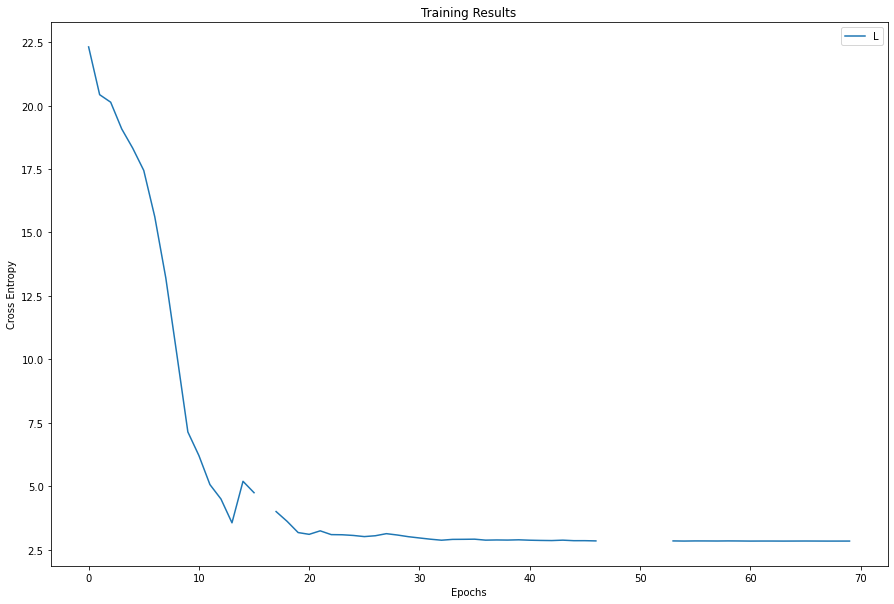

In [67]:
plt.plot(k_losses)
plt.legend('Losses')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.title('Training Results')
plt.show()

Let's see some of the PDFs parameterized by the second argument of the kernel function:

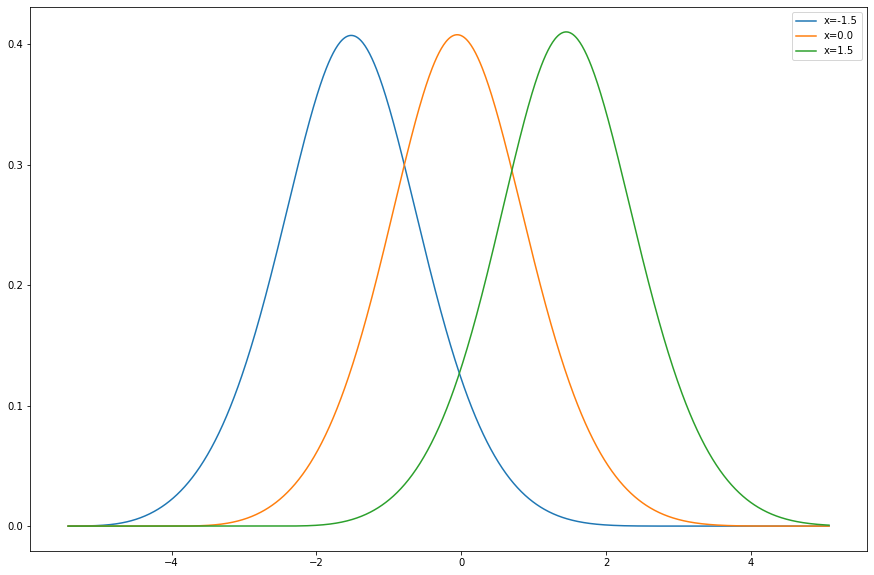

In [68]:
l=1
r=1
mesh_size=1000
y_viz=np.linspace(min(samples)-l,max(samples)+r,mesh_size).reshape(mesh_size,1)
x_viz=np.linspace(-1.5,1.5,3)
z_viz=[]
for x in x_viz:
    tmp_in=np.concatenate([y_viz,x*np.ones((y_viz.shape[0],1))], axis=1)
    tmp_in=torch.tensor(tmp_in,requires_grad=True,dtype=torch.float64).view(y_viz.shape[0],2)
    tmp_z=k_test(tmp_in)
    z_tmp=get_jacobian(tmp_z,
                   tmp_in,
                   tmp_in.shape[0],2,1)
    z_tmp=torch.prod(z_tmp[:,0:e[:,0].sum()],axis=1).detach().numpy()
    z_viz.append(z_tmp)
plt.plot(y_viz,z_viz[0],y_viz,z_viz[1],y_viz,z_viz[2])
plt.legend(['x='+str(x_viz[0]),'x='+str(x_viz[1]),'x='+str(x_viz[2])])


Let's see a surface plot of the kernel PDF:

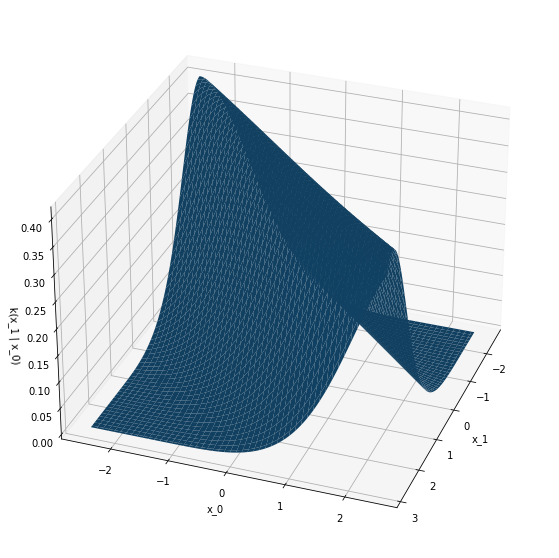

In [80]:
l=1
r=1
mesh_size=100
x_viz=np.linspace(-2.5,2.5,mesh_size)
y_viz=np.linspace(-2.5,2.8,mesh_size)
X_viz,Y_viz=np.meshgrid(x_viz,y_viz)
tx_input=torch.tensor(np.concatenate([X_viz.reshape(mesh_size**2,1),Y_viz.reshape(mesh_size**2,1)],axis=1),
                      requires_grad=True,
                      dtype=torch.float64)
zs=torch.prod(get_jacobian(k_test(tx_input),tx_input,mesh_size**2,2,1)[:,0:e[:,0].sum()],axis=1)
Z_viz=zs.reshape(X_viz.shape).detach().numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y_viz, X_viz, Z_viz)

ax.set_xlabel('x_1')
ax.set_ylabel('x_0')
ax.set_zlabel('k(x_1 | x_0)')

ax.view_init(30, 20)

#plt.figure(figsize=(10,6))

plt.show()

We see that this network is beginning to learn something about the relationship between $X_1$ and $X_0$. In particular, the pdf of $X_1$ begins to center around the value taken on by $X_0$.

# Application

Now that we have learned a kernel function, let's try predicting some outcomes. Beginning with a random variable $X_0\sim N(0,1)$, let's recursively define a Markov process by:
$$X_n=\sim Z_n-X_{n-1}$$
where each $Z_n\sim N(0,1)$. This makes $X_n\sim Z_n(X_{n-1},1)$.

Let's draw a trajectory: $(X_0,X_1,X_2,X_3)$

In [81]:
x_0=np.random.randn(1,1)
x_1=np.random.randn(1,1)+x_0
x_2=np.random.randn(1,1)+x_1
x_3=np.random.randn(1,1)+x_2

In [82]:
(x_0,x_1,x_2,x_3)

(array([[-2.24303546]]),
 array([[-2.17420876]]),
 array([[-1.91315694]]),
 array([[-3.06965352]]))

The probability of $X_4$ exceeding $x_3$ given $(x_0,...,x_3)$ has ocurred is going to be:

$$\frac{1}{\sqrt{2\pi}}\int_{x_3}^{\infty}\exp\big(\frac{(t-x_3)^2}{2}\big)=0.5$$

And, using the CDF of our kernel function, $G$:

$$\int_{x_3}^{\infty}k(t,x_3)dt=1-\int_{-\infty}^{x_3}k(t,x_3)dt=1-G(x_3,x_3)$$

which is:

In [83]:
1.0-k_test(torch.tensor(np.array([[x_3,x_3]]),dtype=torch.float64)).item()

0.48967168349676227

The kernel network might have to be tweaked a little more, trained longer, or initiated better in order to perform better. This initial stab shows a great deal of promise when it comes to kernel learning. These models are resource intensive and hungry for large amounts of data.

One other venue for further research would be to work out a decoder for the kernel's CDF that acts as its inverse. This would make it possible to perform inverse sampling and project trajectories. Alternatively, we can always model the expected value of the next step by approximating

$$\mathbf{E}_{k(dt,x_{n-1})d\mu(x_{n-1})}(X_n~|X_{n-1}=x_{n-1})=\int_{-\infty}^{\infty}tk(t,x_{n-1})dt$$

In [84]:
N=100000
a=-100
b=100
t_mesh=np.linspace(a,b,N).reshape(N,1)
t_mesh.shape
integral=0
t_mesh
x_mesh=x_3*np.ones((N,1))
input_mesh=torch.tensor(np.concatenate([t_mesh,x_mesh],axis=1),dtype=torch.float64,requires_grad=True)
zs=torch.prod(get_jacobian(k_test(input_mesh),input_mesh,N,2,1)[:,0:e[:,0].sum()],axis=1)
zs=zs.detach().numpy()
for i in range(1,N):
    integral+=(t_mesh[i][0]-t_mesh[i-1][0])*zs[i]*t_mesh[i][0]
print(integral)

-3.1069884781405674


which comes pretty close to our $x_3$ value of:

In [85]:
x_3

array([[-3.06965352]])